# Data Vizualisation 

1. Histogram of plant species distribution (Alex)
2. Distribution of healthy vs. unhealthy samples (Alex)
3. Overview of disease types (Felix)
4. Distribution of image brightness (Felix)
5. Distribution of image pixel dimensions

### 0. Import packages and load the data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_excel("01_computed_data_sets_plant_dataset_detailed.xlsx")

In [29]:
df.describe()

,grayscale_brightness,perceptual_brightness,creation_date,modification_date,modification_year,width,height,total_pixels,megapixels
count,70295.000000,70295.000000,70295,70295,70295.0,70295.0,70295.0,70295.0,7.029500e+04
mean,123.520394,123.520338,2025-06-13 08:49:46.575504896,2019-10-12 07:38:55.732755200,2019.0,256.0,256.0,65536.0,7.000000e-02
min,8.246216,8.248599,2025-06-13 08:49:45.248000,2019-10-12 07:37:54,2019.0,256.0,256.0,65536.0,7.000000e-02
25%,109.596001,109.596911,2025-06-13 08:49:45.910000128,2019-10-12 07:38:22,2019.0,256.0,256.0,65536.0,7.000000e-02
50%,120.716217,120.719205,2025-06-13 08:49:46.583000064,2019-10-12 07:38:52,2019.0,256.0,256.0,65536.0,7.000000e-02
75%,132.013039,132.014621,2025-06-13 08:49:47.252999936,2019-10-12 07:39:30,2019.0,256.0,256.0,65536.0,7.000000e-02
max,253.309830,253.307983,2025-06-13 08:49:47.918000,2019-10-12 07:40:08,2019.0,256.0,256.0,65536.0,7.000000e-02
std,25.620452,25.620695,NaN,NaN,0.0,0.0,0.0,0.0,4.163366e-17


In [30]:

print(df.dtypes)

file_path                          object
file_name                          object
class                              object
plant                              object
disease                            object
uuid                               object
source_code                        object
image_id                           object
augmentation                       object
grayscale_brightness              float64
perceptual_brightness             float64
creation_date              datetime64[ns]
modification_date          datetime64[ns]
modification_year                   int64
modification_year_month            object
width                               int64
height                              int64
total_pixels                        int64
megapixels                        float64
dtype: object


### 1. Histogram of plant species distribution (Alex)

### 2. Distribution of healthy vs. unhealthy samples (Alex)

### 3. Overview of disease types (Felix)

In [52]:
df["disease"].value_counts()   

disease
healthy                                 22294
Bacterial_spot                           5453
Black_rot                                3875
Early_blight                             3859
Late_blight                              3790
Powdery_mildew                           3419
Apple_scab                               2016
Haunglongbing_(Citrus_greening)          2010
Tomato_Yellow_Leaf_Curl_Virus            1961
Esca_(Black_Measles)                     1920
Northern_Leaf_Blight                     1908
Common_rust_                             1907
Leaf_Mold                                1882
Target_Spot                              1827
Tomato_mosaic_virus                      1790
Leaf_scorch                              1774
Cedar_apple_rust                         1760
Septoria_leaf_spot                       1745
Spider_mites Two-spotted_spider_mite     1741
Leaf_blight_(Isariopsis_Leaf_Spot)       1722
Cercospora_leaf_spot Gray_leaf_spot      1642
Name: count, dtype: int64

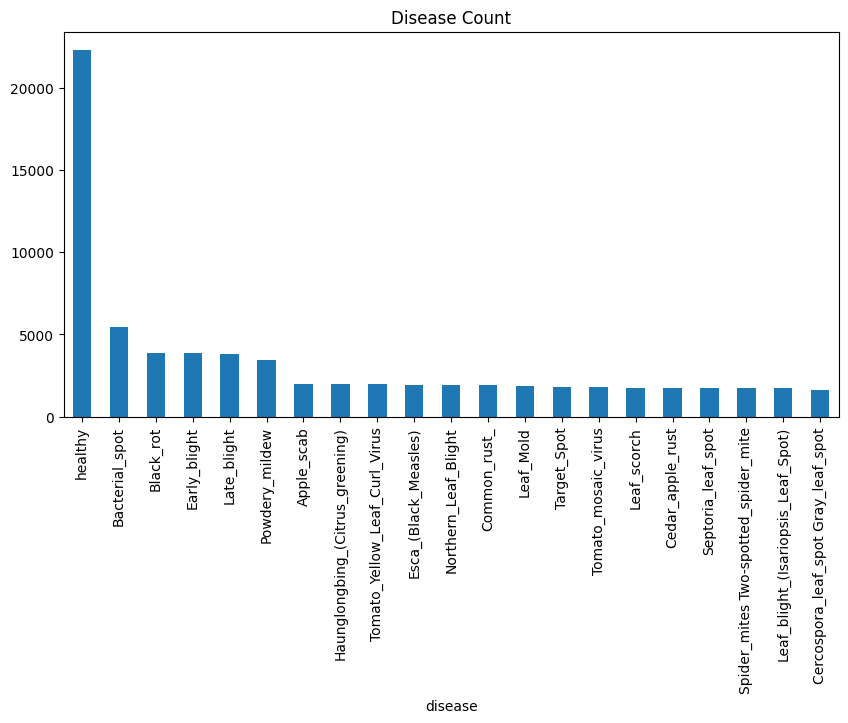

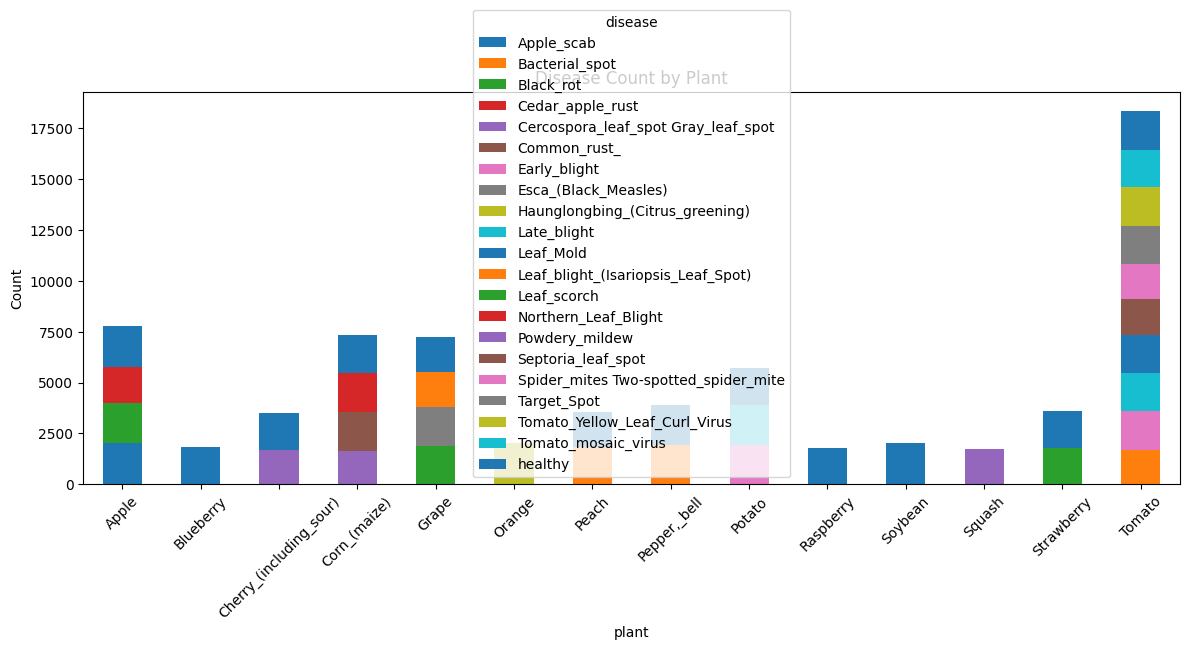

In [31]:
df["disease"].value_counts()   
df["disease"].value_counts().plot(kind="bar", figsize=(10, 5), title="Disease Count")   



# Group by 'plant' and 'disease', then count occurrences
df.groupby(['plant', 'disease']).size().unstack().plot(
    kind='bar', 
    stacked=True,  # Optional: Set to False for side-by-side bars
    figsize=(12, 6),
    title='Disease Count by Plant'
)
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate plant names for readability
plt.tight_layout()  # Prevent label cutoff
plt.show()

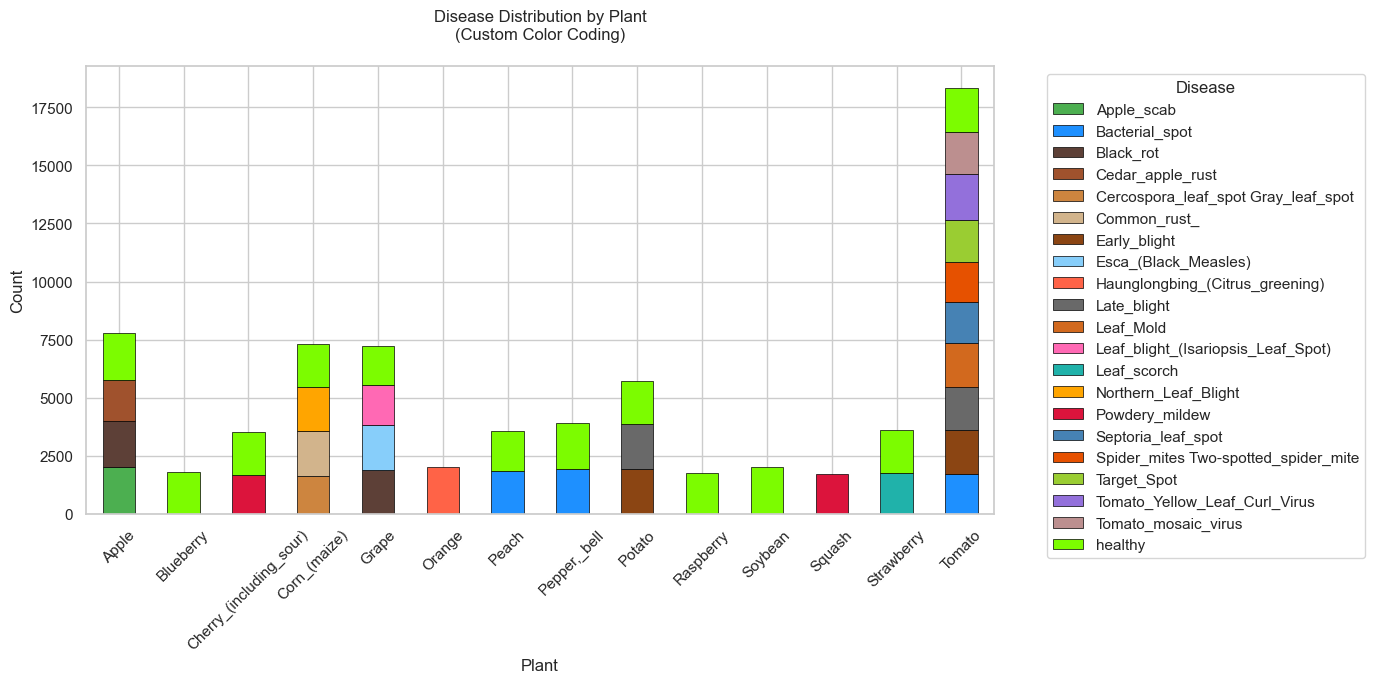

In [54]:
# Define a clear color mapping (with 'healthy' always green)
disease_colors = {
    # Healthy plants (always bright green)
    "healthy": "#4CAF50",
    
    # Fungal diseases (browns/oranges)
    "Powdery_mildew": "#D2B48C",      # Tan
    "Apple_scab": "#8B4513",           # SaddleBrown
    "Black_rot": "#5D4037",            # Dark brown
    "Cedar_apple_rust": "#E65100",     # Rust orange
    "Early_blight": "#A0522D",         # Sienna
    "Late_blight": "#CD853F",          # Peru
    "Leaf_blight_(Isariopsis_Leaf_Spot)": "#BC8F8F",  # RosyBrown
    "Northern_Leaf_Blight": "#D2691E", # Chocolate
    
    # Bacterial diseases (blues)
    "Bacterial_spot": "#1E90FF",       # DodgerBlue
    "Leaf_scorch": "#4682B4",          # SteelBlue
    "Haunglongbing_(Citrus_greening)": "#87CEFA",  # LightSkyBlue
    
    # Viral diseases (reds/pinks)
    "Tomato_Yellow_Leaf_Curl_Virus": "#FF6347",    # Tomato
    "Tomato_mosaic_virus": "#DC143C",              # Crimson
    "Common_rust_": "#FF69B4",                     # HotPink
    
    # Pest-related (purples)
    "Spider_mites Two-spotted_spider_mite": "#9370DB",  # MediumPurple
    
    # Other (distinct colors)
    "Esca_(Black_Measles)": "#696969",       # DimGray
    "Leaf_Mold": "#20B2AA",                  # LightSeaGreen
    "Target_Spot": "#FFA500",                # Orange
    "Septoria_leaf_spot": "#9ACD32",         # YellowGreen
    "Cercospora_leaf_spot Gray_leaf_spot": "#7CFC00"  # LawnGreen
}

# Get colors in correct order for the current data
colors = [disease_colors[d] for d in df['disease'].value_counts().index]

# Create the plot with custom colors
df.groupby(['plant', 'disease']).size().unstack().plot(
    kind='bar',
    stacked=True,
    color=colors,  # Use our custom color mapping
    figsize=(14, 7),
    edgecolor='black',
    linewidth=0.5
)

plt.title('Disease Distribution by Plant\n(Custom Color Coding)', pad=20)
plt.ylabel('Count')
plt.xlabel('Plant')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), title='Disease')
plt.tight_layout()
plt.show()

# Commentry
- Tomato highly overrepresended in desease too
- No healthy pictures of Orange & Squash
=> No use in the model training 
- No desease pictures of BLueberry, Raspberry & Soybean
=> No use in the desease training model

### 4. Distribution of image brightness (Felix)

In [ ]:
df["perceptual_brightness"].value_counts().sort_values(ascending=False)


perceptual_brightness
103.056438    3
96.000469     3
90.229843     3
135.321098    2
114.649790    2
             ..
137.438595    1
137.474572    1
126.289355    1
133.647703    1
125.288051    1
Name: count, Length: 68258, dtype: int64

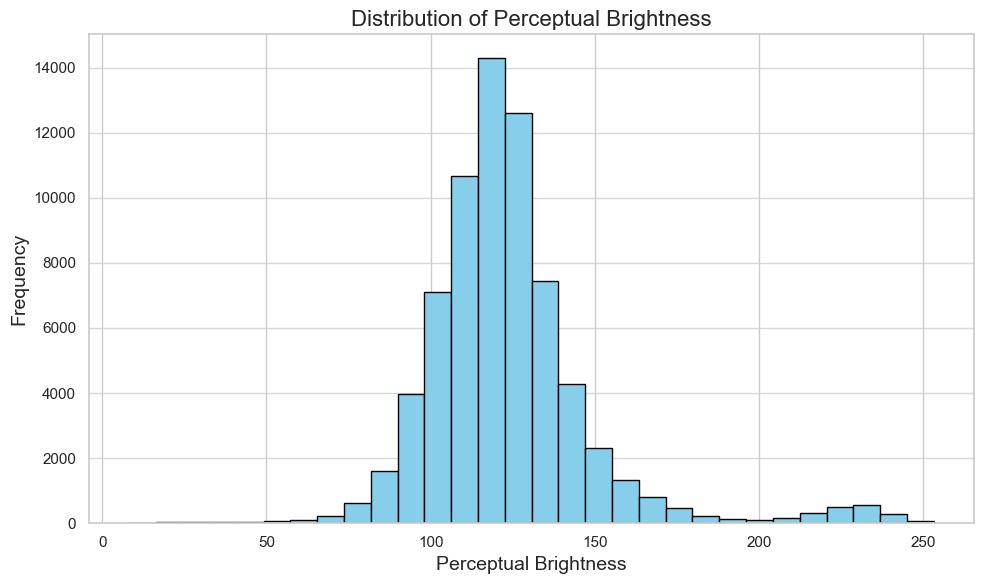

In [64]:
# Plot histogram for perceptual brightness
plt.figure(figsize=(10, 6))
plt.hist(df["perceptual_brightness"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Perceptual Brightness", fontsize=16)
plt.xlabel("Perceptual Brightness", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

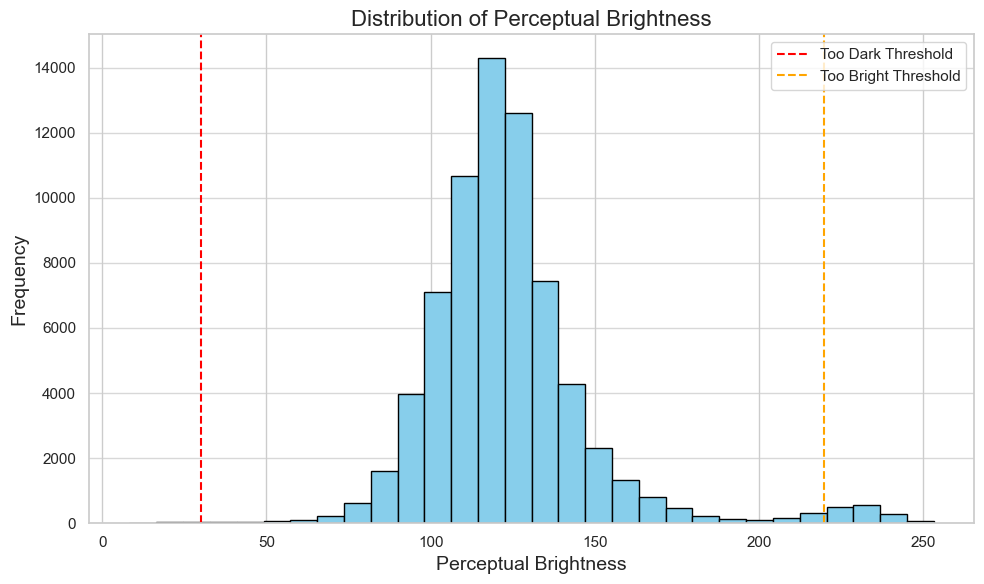

In [69]:
# Define thresholds
too_dark_threshold = 30
too_bright_threshold = 220

# Plot histogram for perceptual brightness
plt.figure(figsize=(10, 6))
plt.hist(df["perceptual_brightness"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.axvline(too_dark_threshold, color='red', linestyle='--', label='Too Dark Threshold')
plt.axvline(too_bright_threshold, color='orange', linestyle='--', label='Too Bright Threshold')
plt.title("Distribution of Perceptual Brightness", fontsize=16)
plt.xlabel("Perceptual Brightness", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### 5. Distribution of image pixel dimensions

In [ ]:
df["hight"].value_counts().sort_values(ascending=False)

total_pixels
65536    70295
Name: count, dtype: int64

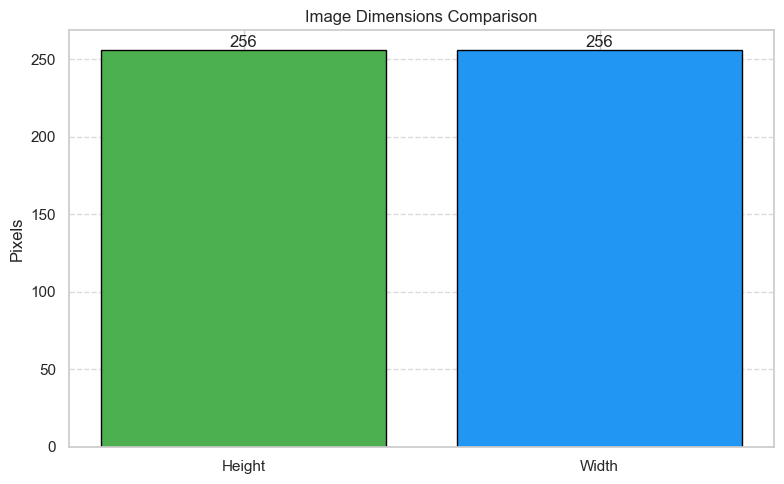

In [73]:
# Extract the single values
height_value = df['height'].iloc[0]
width_value = df['width'].iloc[0]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(['Height', 'Width'], [height_value, width_value], 
               color=['#4CAF50', '#2196F3'], edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Image Dimensions Comparison')
plt.ylabel('Pixels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

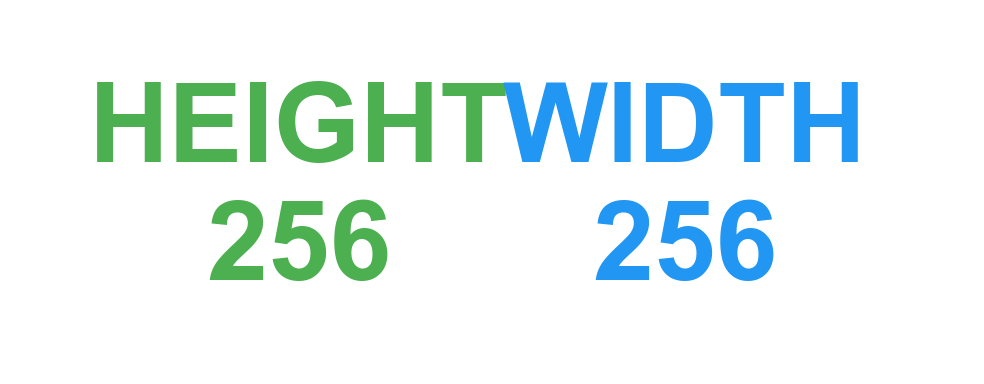

In [74]:
# Get the values
height = df['height'].iloc[0]
width = df['width'].iloc[0]

# Create figure with no borders
fig, ax = plt.subplots(figsize=(10, 4), facecolor='none')
ax.axis('off')  # Hide all axes

# Display height (left)
plt.text(0.3, 0.5, f"HEIGHT\n{height}", 
         fontsize=80, ha='center', va='center', 
         color='#4CAF50', fontweight='bold')

# Display width (right) 
plt.text(0.7, 0.5, f"WIDTH\n{width}", 
         fontsize=80, ha='center', va='center',
         color='#2196F3', fontweight='bold')

plt.tight_layout()
plt.show()